In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from sklearn.linear_model import LinearRegression


In [2]:
# import data of confirmed cases, deaths and recovered
confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('time_series_covid19_deaths_global.csv')
recovered_df = pd.read_csv('time_series_covid19_recovered_global.csv')

In [3]:
# check data in dataframes
confirmed_df
deaths_df
recovered_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,73635,74480,75314,76218,77280,78521,79446,80226,81077,82586
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,130023,130027,130029,130033,130035,130037,130043,130047,130050,130052
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,98031,98387,98748,99101,99510,99931,100383,100911,101430,102010
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,13721,13721,13721,13752,13757,13760,13770,13770,13770,13787
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,33514,33669,33739,34019,34047,34100,34169,34298,34327,34357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,7643,7819,8022,8077,8557,8950,8984,9204,9275,9331
260,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,308550,308774,308774,309059,309251,309251,309543,309689,309910,310027
261,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,4087,4104,4108,4111,4117,4119,4128,4135,4141,4142
262,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,140880,143128,145908,147751,149421,152103,154776,157489,160215,162239


In [4]:
# chekc similar column names
print(confirmed_df.keys())
print(deaths_df.keys())
print(recovered_df.keys())
    

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/3/21', '7/4/21', '7/5/21', '7/6/21', '7/7/21', '7/8/21', '7/9/21',
       '7/10/21', '7/11/21', '7/12/21'],
      dtype='object', length=542)
Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/3/21', '7/4/21', '7/5/21', '7/6/21', '7/7/21', '7/8/21', '7/9/21',
       '7/10/21', '7/11/21', '7/12/21'],
      dtype='object', length=542)
Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '7/3/21', '7/4/21', '7/5/21', '7/6/21', '7/7/21', '7/8/21', '7/9/21',
       '7/10/21', '7/11/21', '7/12/21'],
      dtype='object', length=542)


### Looks like all dataframes have identical columns and all collect data from (January 22, 2020 - July, 12, 2021) *most updated date

Lets first try to plot the data of cases over time!

In [6]:
# extract only date columns from confirmed cases dataframe
confirmed_col = confirmed_df.keys()
confirmed_dates = confirmed_df.loc[:,confirmed_col[4]:confirmed_col[-1]]
confirmed_dates

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,7/3/21,7/4/21,7/5/21,7/6/21,7/7/21,7/8/21,7/9/21,7/10/21,7/11/21,7/12/21
0,0,0,0,0,0,0,0,0,0,0,...,120216,120216,125937,127464,129021,130113,131586,131586,131586,134653
1,0,0,0,0,0,0,0,0,0,0,...,132534,132535,132537,132544,132557,132565,132580,132587,132592,132597
2,0,0,0,0,0,0,0,0,0,0,...,141007,141471,141966,142447,143032,143652,144483,145296,146064,146942
3,0,0,0,0,0,0,0,0,0,0,...,13918,13918,13918,13991,14021,14050,14075,14075,14075,14155
4,0,0,0,0,0,0,0,0,0,0,...,39172,39230,39300,39375,39491,39593,39791,39881,39958,40055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,0,2,2,2,2,2,2,2,2,2,...,19310,20261,21312,22341,23385,24810,26608,28470,30478,32665
275,0,0,0,0,0,0,0,0,0,0,...,314492,314569,314569,314780,314869,314869,315047,315107,315160,315224
276,0,0,0,0,0,0,0,0,0,0,...,6926,6929,6929,6931,6934,6936,6940,6941,6948,6952
277,0,0,0,0,0,0,0,0,0,0,...,162487,164282,165513,167132,169003,170456,172405,174789,175729,176742


In [7]:
# Sum up all the cases for each column. We don't care about location specific stuff right now
# we just want to visualize GLOBAL trends

global_cases={}
keys = confirmed_dates.keys()
#print(keys)
for date in keys:
    global_cases[date] = confirmed_dates[date].sum()

In [8]:
global_cases_df = pd.DataFrame.from_dict(global_cases, orient='index',
                       columns=['Number of cases'])

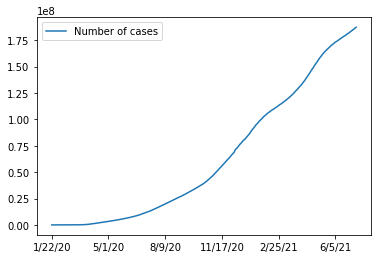

In [9]:
global_cases_df.plot()

In [10]:
'1:2,3:4'.split(':')

['1', '2,3', '4']